In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import librosa
import IPython.display
from IPython.display import Audio
import warnings


In [2]:
# Paths to
Ravdess = "../input/Speech_Emotion_Recognition_Dataset/Ravdess/audio_speech_actors_01-24"
Crema = "../input/Speech_Emotion_Recognition_Dataset/Crema"
Savee = "../input/Speech_Emotion_Recognition_Dataset/Savee"
Tess = "../input/Speech_Emotion_Recognition_Dataset/Tess"
Veteran = "../input/veterantestinterview/08M4HK77.mp3"

# Loading Data

In [3]:
image_dir = Path('Speech_Emotion_Recognition_Dataset/Crema')
filepaths = list(image_dir.glob(r'**/*.wav'))
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))
unique_labels = set(labels)
print(unique_labels)

{'FEA', 'HAP', 'NEU', 'DIS', 'ANG', 'SAD'}


In [4]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

audio_df = pd.concat([filepaths, labels], axis=1)
audio_df


,Filepath,Label
0,Speech_Emotion_Recognition_Dataset\Crema\1001_...,ANG
1,Speech_Emotion_Recognition_Dataset\Crema\1001_...,DIS
2,Speech_Emotion_Recognition_Dataset\Crema\1001_...,FEA
3,Speech_Emotion_Recognition_Dataset\Crema\1001_...,HAP
4,Speech_Emotion_Recognition_Dataset\Crema\1001_...,NEU
...,...,...
7437,Speech_Emotion_Recognition_Dataset\Crema\1091_...,DIS
7438,Speech_Emotion_Recognition_Dataset\Crema\1091_...,FEA
7439,Speech_Emotion_Recognition_Dataset\Crema\1091_...,HAP
7440,Speech_Emotion_Recognition_Dataset\Crema\1091_...,NEU


# Visualising Data

Text(0.5, 1.0, 'Property Area vs Loan Status')

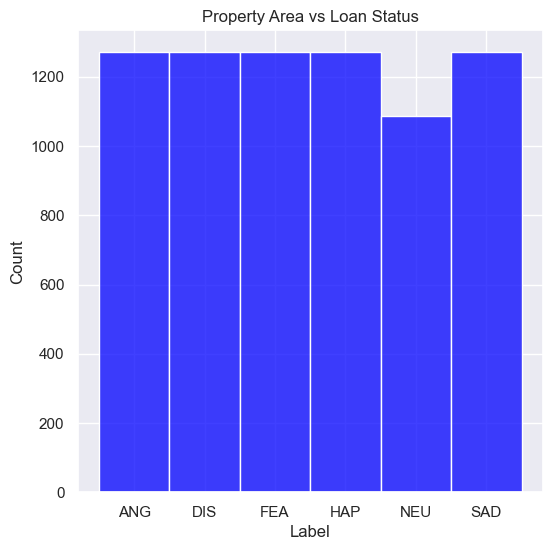

In [5]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style('darkgrid')
sns.histplot(labels, color='blue')
plt.title('Property Area vs Loan Status')

In [6]:
audio_arrays = []

for i in audio_df['Filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio_arrays.append(x)
    
audio_df['Arrays'] = audio_arrays

In [7]:
audio_df

,Filepath,Label,Arrays
0,Speech_Emotion_Recognition_Dataset\Crema\1001_...,ANG,"[6.9185524e-10, 8.411215e-10, 5.0900356e-10, 4..."
1,Speech_Emotion_Recognition_Dataset\Crema\1001_...,DIS,"[0.00083351025, 0.0011382565, 0.0012377766, 0...."
2,Speech_Emotion_Recognition_Dataset\Crema\1001_...,FEA,"[0.007539533, 0.009629492, 0.008980679, 0.0084..."
3,Speech_Emotion_Recognition_Dataset\Crema\1001_...,HAP,"[-0.0039882455, -0.004723385, -0.0038926, -0.0..."
4,Speech_Emotion_Recognition_Dataset\Crema\1001_...,NEU,"[0.0022234665, 0.002518577, 0.001856927, 0.001..."
...,...,...,...
7437,Speech_Emotion_Recognition_Dataset\Crema\1091_...,DIS,"[0.0009247182, 0.001315127, 0.0013675159, 0.00..."
7438,Speech_Emotion_Recognition_Dataset\Crema\1091_...,FEA,"[-0.0066004125, -0.008246948, -0.0073625883, -..."
7439,Speech_Emotion_Recognition_Dataset\Crema\1091_...,HAP,"[-0.0020721315, -0.0024467015, -0.0020733473, ..."
7440,Speech_Emotion_Recognition_Dataset\Crema\1091_...,NEU,"[-0.00152146, -0.0017805105, -0.0013755669, -0..."


## 😡  Anger 😡

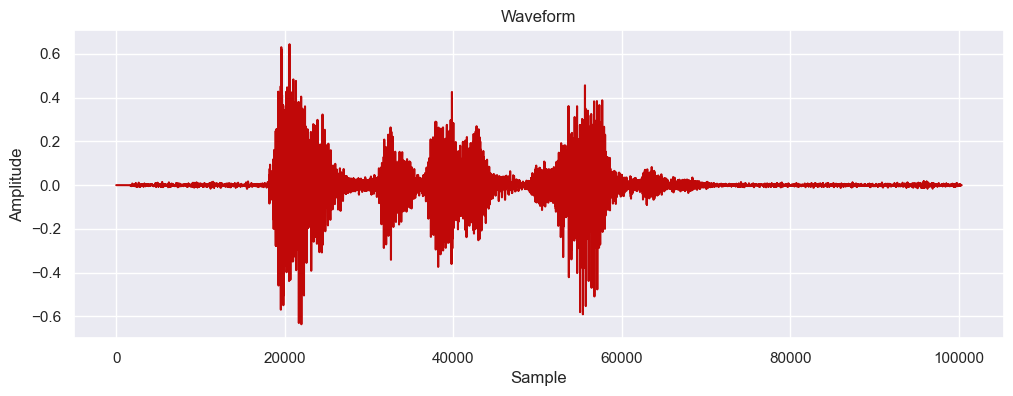

In [8]:
angfile = audio_df[audio_df['Label'] == 'ANG']['Filepath']
angarray = audio_df[audio_df['Label'] == 'ANG']['Arrays']
plt.figure(figsize=(12, 4))
plt.plot(angarray.iloc[0], color='#C00808')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()
IPython.display.Audio(angfile.iloc[0])

## 🤢DISGUST 🤢

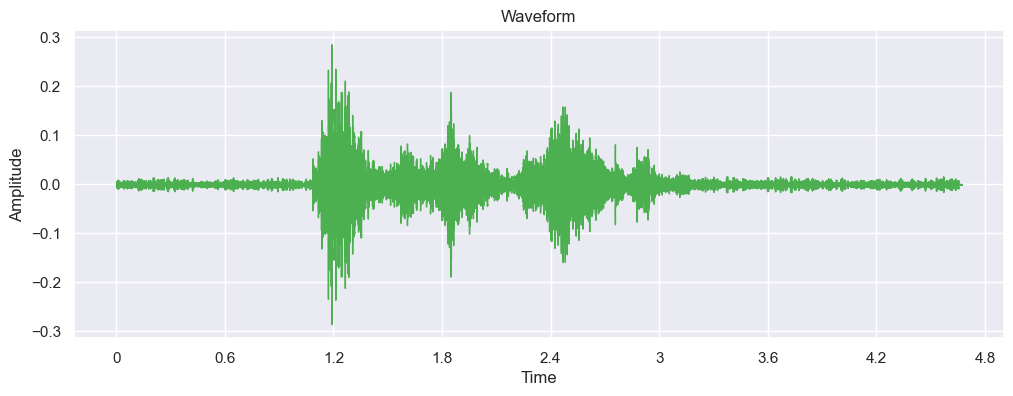

In [9]:
disfile=audio_df[audio_df['Label']=='DIS']['Filepath']
disarray= audio_df[audio_df['Label']=='DIS']['Arrays']
plt.figure(figsize=(12,4))
librosa.display.waveshow(disarray.iloc[0],color='#4CAF50')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()
Audio(disfile.iloc[0])

## 👻 FEAR 👻

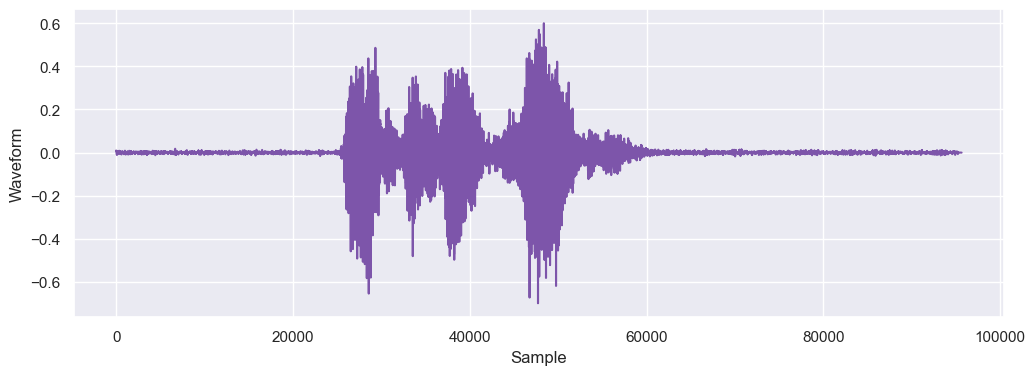

In [10]:
fearfile =audio_df[audio_df['Label']=='FEA']['Filepath']
feaarray =audio_df[audio_df['Label']=='FEA']['Arrays']
plt.figure(figsize=(12,4))
plt.plot(feaarray.iloc[0],color='#7D55AA')
plt.xlabel('Sample')
plt.ylabel('Waveform')
plt.show()
IPython.display.Audio(fearfile.iloc[0])

## 😐 NEUTRAL 😐

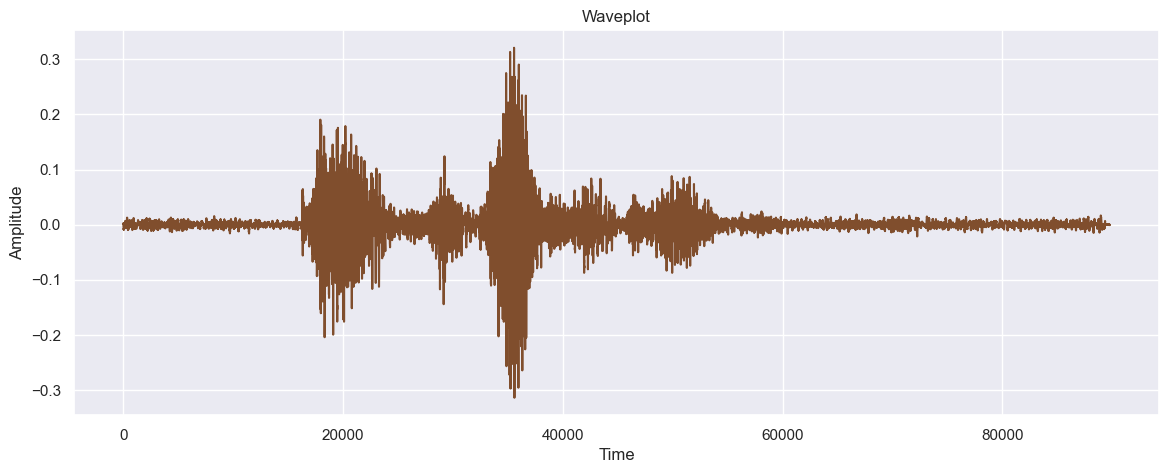

In [11]:
neuarray = audio_df[audio_df['Label'] == 'NEU']['Arrays']
plt.figure(figsize=(14,5))
plt.plot(neuarray.iloc[0],color="#804E2D")
plt.title('Waveplot')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

## 😞SADNESS😞


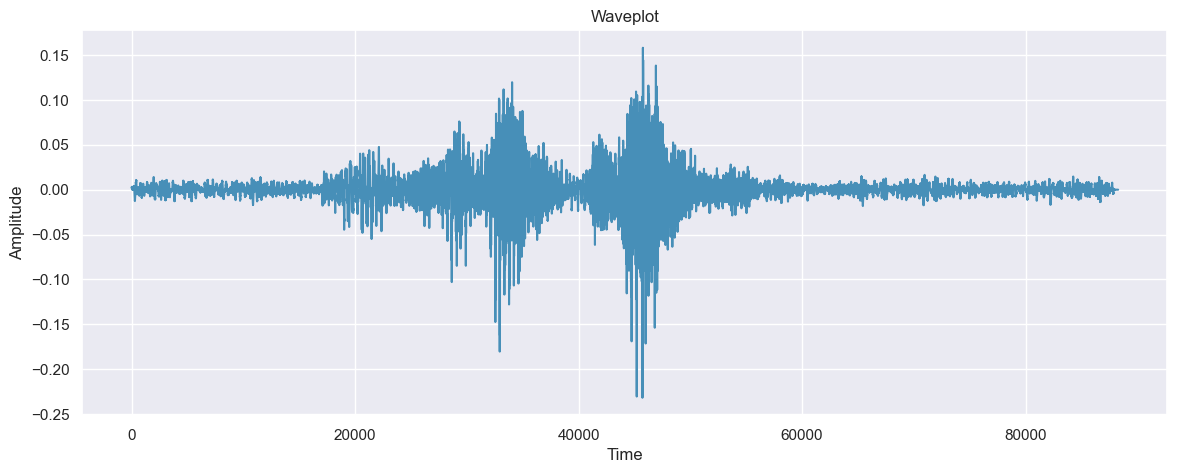

In [12]:
sadarray = audio_df[audio_df['Label']== 'SAD']['Arrays']
plt.figure(figsize=(14,5))
plt.plot(sadarray.iloc[0],color='#478FB8')
plt.title('Waveplot')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()